#DECISION TREE

In [69]:
import pandas as pd
import numpy as np
import warnings 
import math

import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.offline as py
import plotly.io as pio
import plotly.graph_objs as go

import seaborn as sns
import seaborn as sns

from scipy.stats import norm, skew

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pickle

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')


In [8]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
158,2,88,74,19,53,29.0,0.229,22,0
507,1,130,60,23,170,28.6,0.692,21,0
514,3,99,54,19,86,25.6,0.154,24,0
245,9,184,85,15,0,30.0,1.213,49,1
400,4,95,64,0,0,32.0,0.161,31,1
3,1,89,66,23,94,28.1,0.167,21,0
16,0,118,84,47,230,45.8,0.551,31,1
744,13,153,88,37,140,40.6,1.174,39,0
725,4,112,78,40,0,39.4,0.236,38,0
760,2,88,58,26,16,28.4,0.766,22,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


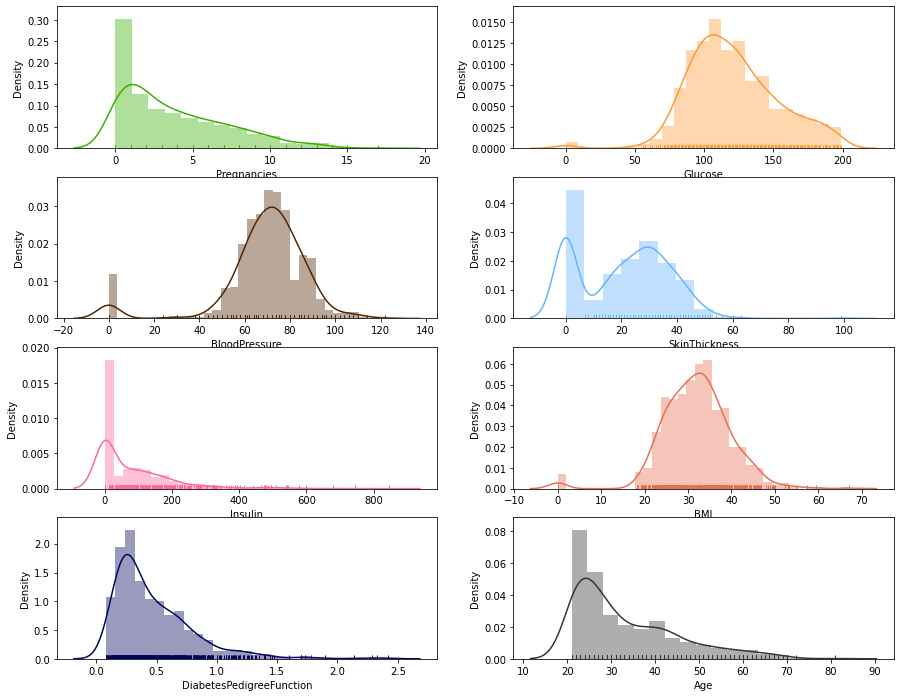

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

limpieza de datos

In [15]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [19]:
len(df[df['BloodPressure']==0])


35

In [18]:
len(df[df['BMI']==0])

11

In [20]:
df_clean = df.copy()
df_clean = df_clean[(df_clean["BMI"] > 0 ) & (df_clean["BloodPressure"] > 0) & (df_clean["Glucose"] > 0)]
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:

X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 534 to 273
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               543 non-null    int64  
 1   Glucose                   543 non-null    int64  
 2   BloodPressure             543 non-null    int64  
 3   SkinThickness             543 non-null    int64  
 4   Insulin                   543 non-null    int64  
 5   BMI                       543 non-null    float64
 6   DiabetesPedigreeFunction  543 non-null    float64
 7   Age                       543 non-null    int64  
 8   Outcome                   543 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB


In [24]:
df_train.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
30,5,109,75,26,0,36.0,0.546,60,0
232,1,79,80,25,37,25.4,0.583,22,0
444,4,117,62,12,0,29.7,0.380,30,1
309,2,124,68,28,205,32.9,0.875,30,1
686,3,130,64,0,0,23.1,0.314,22,0
211,0,147,85,54,0,42.8,0.375,24,0
37,9,102,76,37,0,32.9,0.665,46,1
302,5,77,82,41,42,35.8,0.156,35,0
740,11,120,80,37,150,42.3,0.785,48,1
17,7,107,74,0,0,29.6,0.254,31,1


In [25]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,3.931860,121.517495,72.217311,20.799263,81.182320,32.411050,0.459812,33.504604,0.346225
std,3.415419,30.550230,12.331249,15.897221,111.224474,6.840723,0.310118,12.262484,0.476205
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.450000,0.241000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,45.000000,32.200000,0.364000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.606000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,680.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

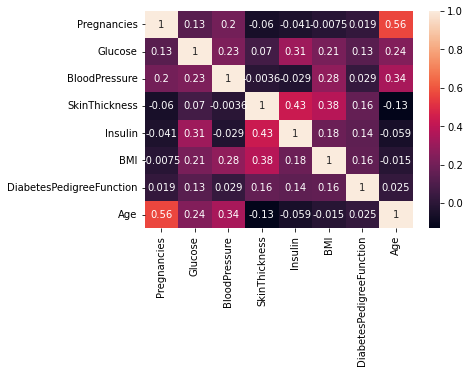

In [26]:
sns.heatmap(X_train.corr(),annot=True)

In [27]:
df_train.corr().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128695,0.203663,-0.059651,-0.041003,-0.007470,0.019356,0.562590,0.214185
Glucose,0.128695,1.000000,0.228245,0.069994,0.313630,0.214476,0.126815,0.241120,0.476305
BloodPressure,0.203663,0.228245,1.000000,-0.003589,-0.029131,0.276175,0.028567,0.340978,0.182279
SkinThickness,-0.059651,0.069994,-0.003589,1.000000,0.434014,0.378657,0.160786,-0.131113,0.103272
Insulin,-0.041003,0.313630,-0.029131,0.434014,1.000000,0.180870,0.144517,-0.059335,0.154062
BMI,-0.007470,0.214476,0.276175,0.378657,0.180870,1.000000,0.155318,-0.014559,0.303647
DiabetesPedigreeFunction,0.019356,0.126815,0.028567,0.160786,0.144517,0.155318,1.000000,0.024778,0.231706
Age,0.562590,0.241120,0.340978,-0.131113,-0.059335,-0.014559,0.024778,1.000000,0.228164
Outcome,0.214185,0.476305,0.182279,0.103272,0.154062,0.303647,0.231706,0.228164,1.000000


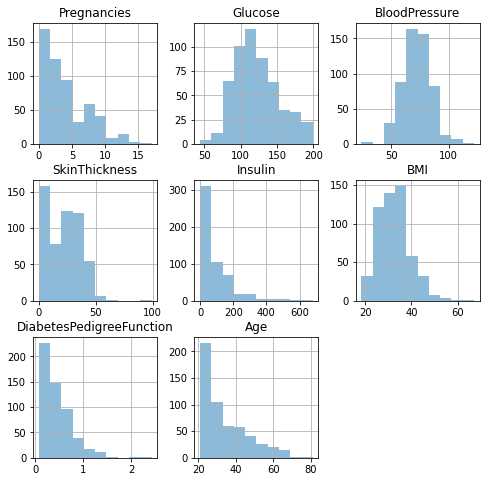

In [28]:
X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

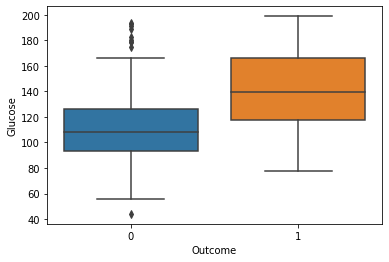

In [29]:
sns.boxplot(x="Outcome", y="Glucose", data=df_train)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

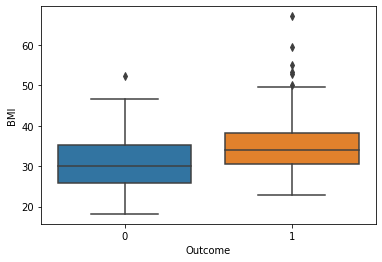

In [30]:
sns.boxplot(x="Outcome", y="BMI", data=df_train)

In [31]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

clf.fit(X_train, y_train)

print('Accuracy model 1 - train set:', clf.score(X_train, y_train))
print('Accuracy model 1 - test set:', clf.score(X_test, y_test))

Accuracy model 1 - train set: 1.0
Accuracy model 1 - test set: 0.7182320441988951


In [32]:
clf_pred=clf.predict(X_test)

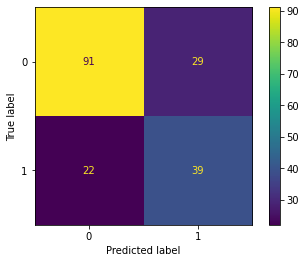

In [37]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()

plt.show()

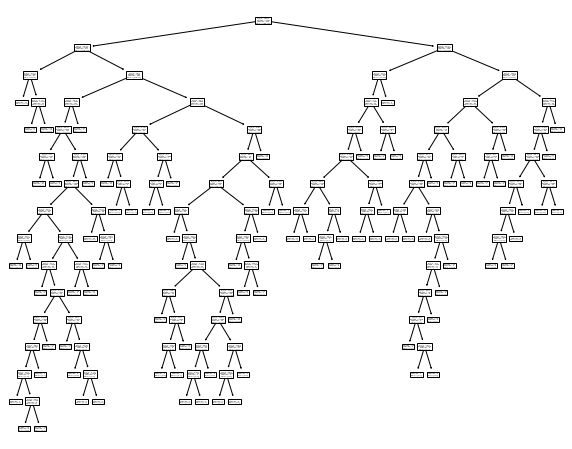

In [55]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()

Cross validation

In [58]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split':range(1,10), 'min_samples_leaf': range(1,5)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, n_jobs=-1,cv=3)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [59]:
model_cv = grid.best_estimator_ 

In [60]:

grid.best_score_ 

0.7661141804788213

In [61]:
grid.score(X_train, y_train)

0.8250460405156538

In [63]:
y_pred = model_cv.predict(X_test)
np.mean(y_test==y_pred)

0.7237569060773481

In [64]:
grid.score(X_test, y_test)

0.7237569060773481

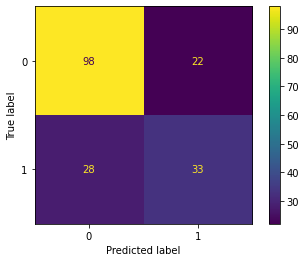

In [65]:
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=grid.classes_)
disp.plot()

plt.show()

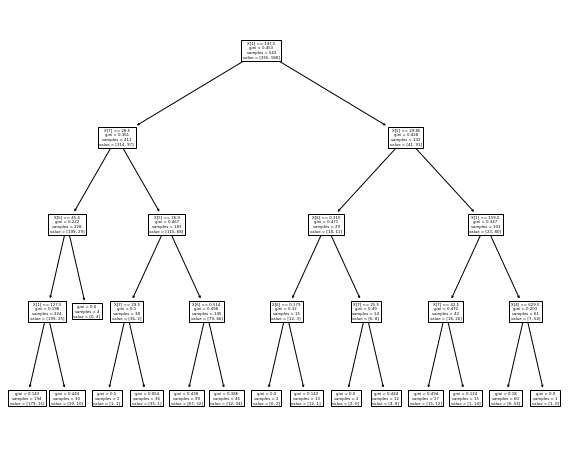

In [66]:
plt.figure(figsize=(10,8))
tree.plot_tree(model_cv)
plt.show()

In [71]:
filename = '../models/model_cv.sav'
pickle.dump(model_cv, open(filename, 'wb'))